# Tina Rezvanian


Computational graph for the following expression:

$$(xy + 2z+\frac{1}{x})= f$$

Calculating the forward values of all the nodes and function f starting with x = -2,y = 1,z = 3.


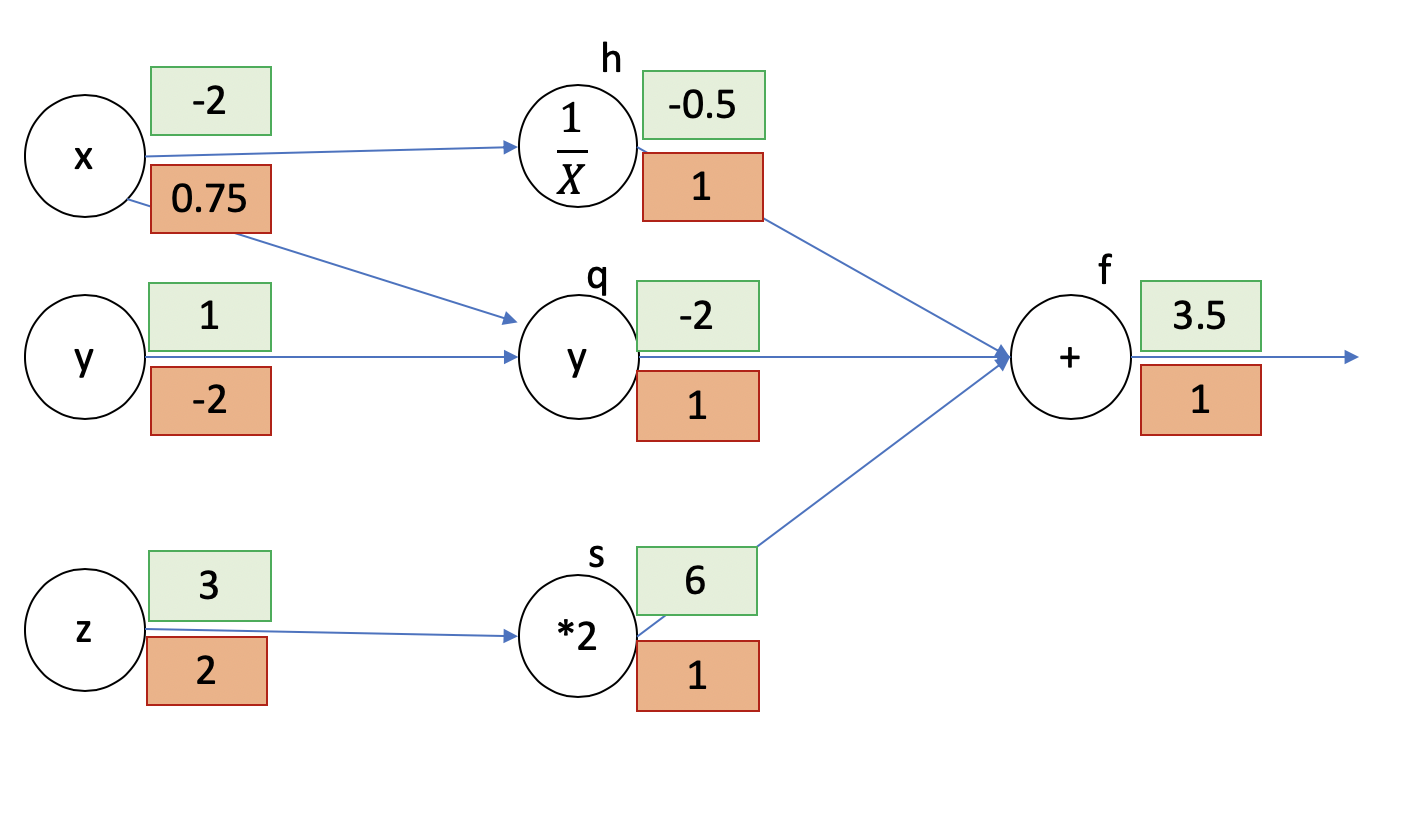

In [3]:
from PIL import Image
import scipy.ndimage
from matplotlib import pyplot as plt
%matplotlib inline
comp_graph = Image.open("comp_img1.png")
comp_graph

The green boxes(placed above nodes) show the forward values of each nodes, the orange boxes(placed below nodes)  are thebackpropagation or the derivatives.

<!-- <img src="w2_assignment_p1.png"> --> 

Recording partial derivatives of every intermediate node w.r.t each of its inputs

$\frac{\partial f }{\partial q}  = 1$  $$ $$
$ \frac{\partial f }{\partial s}  = 1$  $$ $$
$\frac{\partial f }{\partial h}  = 1$  $$ $$
$q=x*y, \quad  \frac{\partial q }{\partial y} = 1$ $$ $$
$   \frac{\partial q }{\partial x} = 1$ $$ $$
$s=2*z, \quad   \frac{\partial s }{\partial z} = 2$  $$ $$
$h = \frac{1}{x},\quad   \frac{\partial h }{\partial x} = -\frac{1}{x^2} =-\frac{1}{4}$  $$ $$


Determining the derivatives of f with respect with x, y, and z:


$ \frac{\partial f}{\partial x} = \frac{\partial f }{\partial q} \frac{\partial q }{\partial x} +
\frac{\partial f }{\partial h} \frac{\partial h }{\partial x}=1-\frac{1}{4}= 0.75$ $$ $$

$ \frac{\partial f}{\partial y} = \frac{\partial f }{\partial q} \frac{\partial q }{\partial y}=1(-2)=-2 $ $$ $$

$ \frac{\partial f}{\partial z} = \frac{\partial f }{\partial s} \frac{\partial s }{\partial z}=1(2)=2 $ $$ $$



# Coding  partial derivatives
if function f as defined as above , then tf 𝑡𝑓.𝐺𝑟𝑎𝑑𝑖𝑒𝑛𝑡𝑇𝑎𝑝𝑒() provides the partial deriv's with respect to x, y and z:

In [136]:
import tensorflow as tf

In [132]:

# creating f function 
@tf.function
def f(x,y,z):
    return x * y + 2 * z + tf.pow(x,-1)


# creating the get_derivate function, that records the gradients in tape and
# returns the gradient values of df_dx, df_dy, df_dz based on the inputted amounts for x, y and z
@tf.function
def get_derivate(x,y,z):
  with tf.GradientTape() as tape:
    w = f(x,y,z)
  gradients = tape.gradient(w,[x,y,z])
  return gradients

In [133]:
# trying out the created function by x and y as tf.variables
x = tf.Variable(-2.0)
y = tf.Variable(1.0)
z = tf.Variable(3.0)
gradients = get_derivate(x,y,z)
print('df_dx:',gradients[0].numpy(),'df_dy:',gradients[1].numpy(), 'df_dz:',gradients[2].numpy())

df_dx: 0.75 df_dy: -2.0 df_dz: 2.0


# Using tf.GradientTape(), creating a computational graph for expression:

$$ f = \frac{(x + σ(-y))}{(x-y)^2}  $$, Where  $$σ(q) = \frac{1}{(1+ e^{(-q)})}$$
using (x,y) = (1, -3)

Here is the f function when sigma function is plugged in:

$$ f = \frac{(x + \frac{1}{(1+ e^{(-(-y))})})}{(x-y)^2}  $$ 

The green boxes(placed above nodes) show the forward values of each nodes,
the orange boxes(placed below nodes)  are the backpropagation or the derivatives.

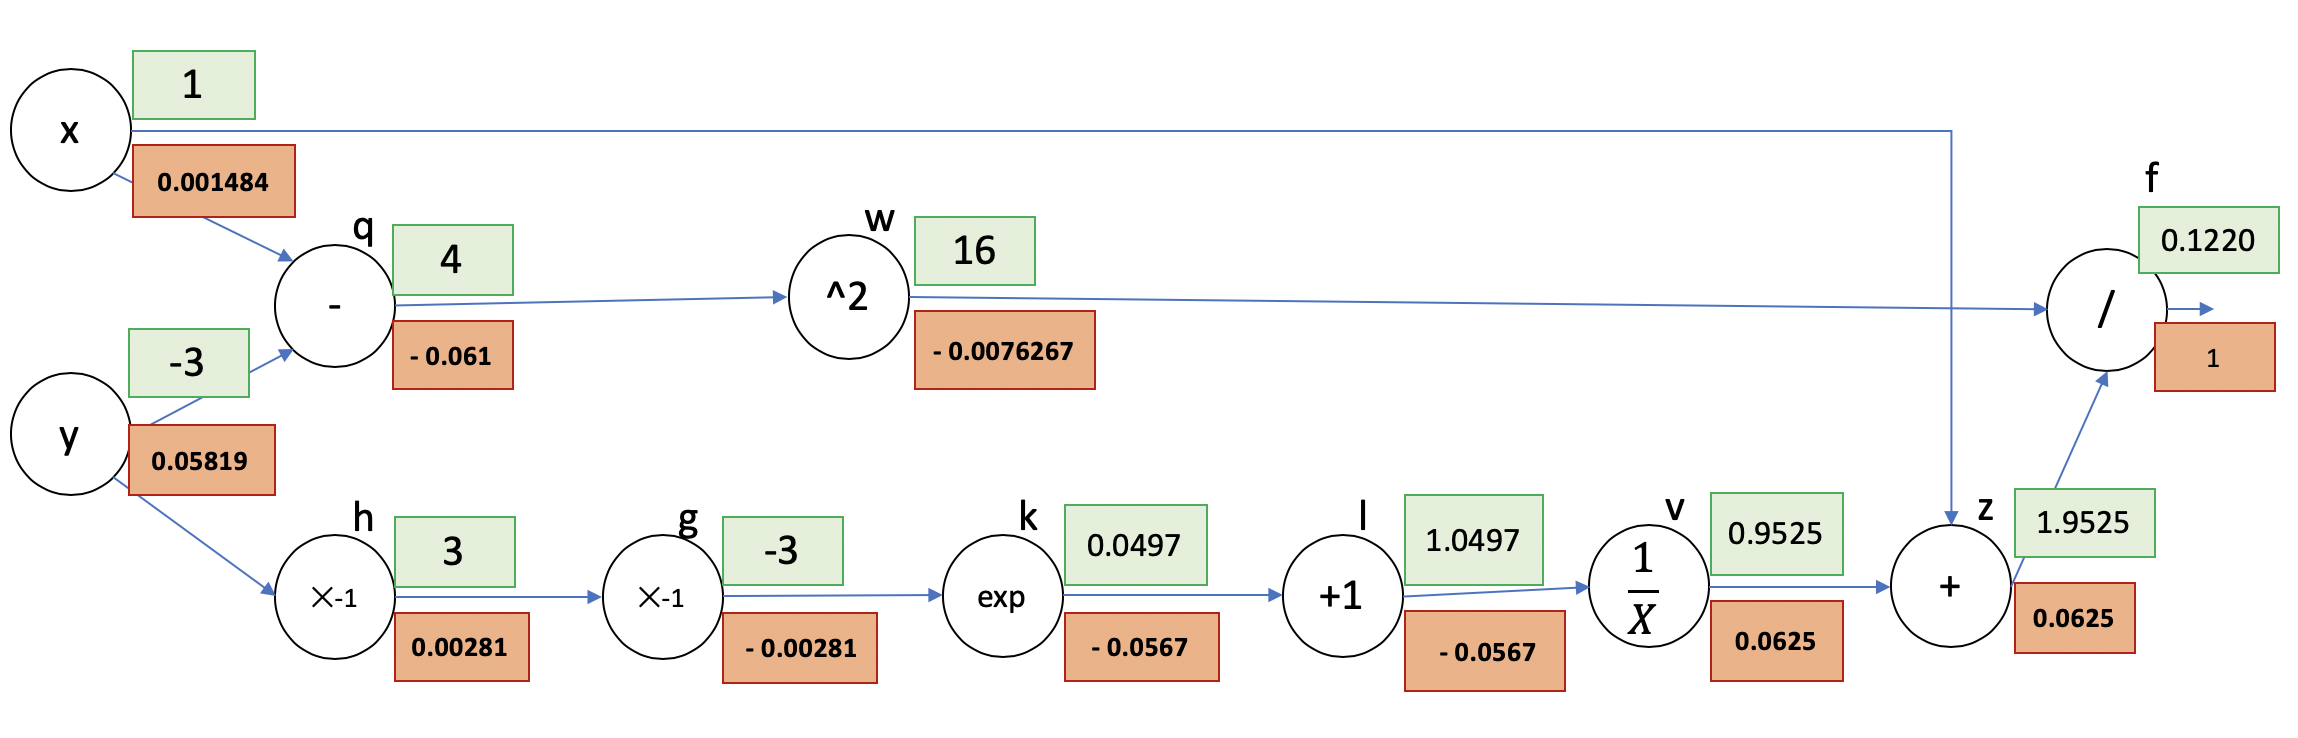

In [4]:
comp_img2 = Image.open("comp_img2.png")
comp_img2

<!-- <img src="w2_assignment_p3.png"> -->

Recording partial derivatives of every intermediate node w.r.t each of its inputs

$\frac{\partial f}{\partial f} = 1 $ $$ $$ $$ $$ 
$f = \frac{z}{w} $ $$ $$ 
$\frac{\partial f}{\partial z} = \frac{1}{w}=0.0625 $ $$ $$
$  \frac{\partial f}{\partial w}=\frac{-z}{w^2}= - 0.007627 $ $$ $$
$ w = q^2$ $$ $$ 
$ \frac{\partial w}{\partial q}= 2*q= 2(4)= 8 $ $$ $$
$ q = x - y$ $$ $$ 
$\frac{\partial {q} }{\partial x} = 1  $ $$ $$
$ \frac{\partial {q}}{\partial y} = 1$ $$ $$
$ z = x + v$ $$ $$ 
$ \frac{\partial z}{\partial x}=1,   \frac{\partial z}{\partial v}=1 $ $$ $$
$ v = \frac{1}{l}$ $$ $$ 
$\frac{\partial v}{\partial l} = \frac{-1}{ l^{2}} = \frac{-1}{ (0.0497)^{2}} = - 0.9075 $ $$ $$
$ l=k + 1$ $$ $$ 
$\frac{\partial l}{\partial k} = 1$ $$ $$
$ k = exp(g)$ $$ $$ 
$\frac{\partial k}{\partial g} = exp(g)=exp(-3)= 0.0497 $ $$ $$
$ g= -h$ $$ $$ 
$\frac{\partial g}{\partial h}= -1 $ $$ $$
$ h = -y$ $$ $$ 
$\frac{\partial h}{\partial y}= -1  $ $$ $$



Determining the derivatives of f to intermediate nodes (to be used in the next section) using chain rule

$ \frac{\partial f}{\partial v} = \frac{\partial f }{\partial z} \frac{\partial z }{\partial v}=(0.0625)(1)= 0.0625$

$ \frac{\partial f}{\partial l} =  \frac{\partial f }{\partial z} \frac{\partial z }{\partial v}\frac{\partial v }{\partial l}  = (0.0625)(1)(- 0.9075)(1) = - 0.0567$

$\frac{\partial f}{\partial k} = \frac{\partial f }{\partial z} \frac{\partial z }{\partial v}\frac{\partial v }{\partial l} \frac{\partial l }{\partial k} =(0.0625)(1)(- 0.9075)(1)= - 0.0567$ $$ $$


$\frac{\partial f}{\partial g} =\frac{\partial f }{\partial z} \frac{\partial z }{\partial v}\frac{\partial v }{\partial l} \frac{\partial l }{\partial k} \frac{\partial k }{\partial g} = (0.0625)(1)(- 0.9075)(1)(0.0497 )=  -0.00281$ $$ $$
$\frac{\partial f}{\partial h} =\frac{\partial f }{\partial z} \frac{\partial z }{\partial v}\frac{\partial v }{\partial l} \frac{\partial l }{\partial k} \frac{\partial k }{\partial g} \frac{\partial g }{\partial h} =(0.0625)(1)(- 0.9075)(1)(0.0497 )(-1)= 0.00281$




$\frac{\partial f}{\partial q} = \frac{\partial f }{\partial w} \frac{\partial w }{\partial q} =(-0.00762)(8)= -0.061$  $$ $$

Determining the derivatives of f with respect with x and y using chain rule:

$  \frac{\partial f}{\partial x} =  \frac{\partial f }{\partial z} \frac{\partial z}{\partial x} + \frac{\partial f}{\partial w} \frac{\partial w}{\partial q}\frac{\partial q}{\partial x} = (0.0625)(1)+(-0.007627)(8)(1) = 0.001484$ $$ $$
$ \frac{\partial f}{\partial y} = \frac{\partial f }{\partial w} \frac{\partial w }{\partial q}\frac{\partial q }{\partial y} + \frac{\partial f }{\partial z} \frac{\partial z }{\partial v}\frac{\partial v }{\partial l} \frac{\partial l }{\partial k} \frac{\partial k }{\partial g} \frac{\partial g }{\partial h} \frac{\partial h }{\partial y}    = (−0.007627)(8)(1)+(0.0625)(1)(- 0.9075)(1)(0.0497 )(-1)(-1) = 0.05819$ $$ $$

# Now Using tf.GradientTape(), the process becomes easier:



In [134]:
# creating the sigmoid function
@tf.function
def sigmoid(x):
    return 1/(1 + tf.exp(-x))
# creating the f function
@tf.function
def f(x,y):
    return (x + sigmoid(-y))/(tf.pow((x -  y),2)) 

# creating the get_derivate function, that records the gradients in tape and
# returns the gradient values of df_dx, df_dy based on the inputted amounts for x, y

@tf.function
def get_derivate(x,y):
  with tf.GradientTape() as tape:
    w = f(x,y)
  gradients = tape.gradient(w,[x,y])
  return gradients

In [135]:
# trying out the created function by x and y as tf.variables
x = tf.Variable(1.0)
y = tf.Variable(-3.0)

gradients = get_derivate(x,y)

print('df_dx:',gradients[0].numpy(),'df_dy:',gradients[1].numpy())

df_dx: 0.0014820583 df_dy: 0.0581944
